The program begins by importing essential libraries commonly used for data manipulation, visualization, and preprocessing, which are key steps in machine learning projects. First, it imports the pandas library as pd, which is a powerful tool for handling structured data using DataFrames. pandas allows loading, cleaning, filtering, and transforming datasets. Second, the numpy library, imported as np, is used for numerical computations, especially for handling arrays and performing mathematical operations. Third, matplotlib.pyplot is imported as plt to create visualizations such as plots and histograms. Fourth, seaborn, imported as sns, is used for statistical plots with more attractive and informative visual styles, often working seamlessly with pandas DataFrames. The missingno library, imported as msno, is a tool for visualizing missing data patterns in datasets, such as null-value heatmaps or bar charts. Additionally, several preprocessing tools from sklearn are imported: OneHotEncoder for converting categorical data into numerical format suitable for machine learning, and MinMaxScaler and StandardScaler for feature scaling. MinMaxScaler transforms features to a specific range, usually between 0 and 1, while StandardScaler standardizes features by centering them to a mean of zero and a standard deviation of one.

In [286]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler


The google.colab.drive is imported to mount Google Drive, which is necessary to access the dataset stored in the my g-drive.The line drive.mount('/content/drive') mounts the My Google Drive to Colab so that the program can access files stored in it. Once mounted, the dataset is loaded from the provided file path into a Pandas DataFrame using pd.read_csv().

In [287]:
from google.colab import drive

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/LR_Chicago Crime Incident 2024.csv')

print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         ID Case Number                    Date              Block  IUCR  \
0  13326550    JH102206  01/02/2024 12:00:00 AM   061XX S GREEN ST  0810   
1  13327683    JH103213  01/02/2024 12:00:00 AM    014XX W 63RD ST  0910   
2  13330340    JH106364  01/02/2024 12:00:00 AM  045XX N MALDEN ST  1152   
3  13327026    JH101740  01/02/2024 12:00:00 AM    010XX W 79TH ST  1320   
4  13327640    JH103242  01/02/2024 12:00:00 AM  055XX N MASON AVE  1120   

          Primary Type            Description  \
0                THEFT              OVER $500   
1  MOTOR VEHICLE THEFT             AUTOMOBILE   
2   DECEPTIVE PRACTICE  ILLEGAL USE CASH CARD   
3      CRIMINAL DAMAGE             TO VEHICLE   
4   DECEPTIVE PRACTICE                FORGERY   

                     Location Description  Arrest  Domestic  ...  Ward  \
0                                  STREET   F

The df.head() command displays the first five rows of the dataset, giving a quick look at the data structure. The shape of the dataset, which represents the number of rows and columns, is printed using df.shape.

In [288]:
print("Initial shape of the dataset:", df.shape)

Initial shape of the dataset: (255748, 22)


This line displays the Initial Columns / Column names in the dataset. The 'df.columns' attribute of the Pandas DataFrame 'df'. It returns the names of all the columns in the Dataframe.

In [289]:
print("Intial columns of the dataset:\n", df.columns)

Intial columns of the dataset:
 Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


Next, the program removes unnecessary columns from the dataset using df.drop(). Columns such as "ID", "Case Number", "Updated On", "Year", "IUCR", "FBI Code", "Block", and "Location" are dropped because they do not provide meaningful insights for analysis. The axis=1 parameter means columns are being removed, and inplace=True applies the changes directly to the DataFrame without creating a copy. The df.head() command shows the updated DataFrame.

In [290]:
df.drop(["ID", "Case Number", "Updated On", "Year", "IUCR", "FBI Code", "Block", "Location"], axis=1, inplace=True)


The df.head() command shows the updated DataFrame.

In [291]:
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Latitude,Longitude
0,01/02/2024 12:00:00 AM,THEFT,OVER $500,STREET,False,False,712,7,16,68.0,1171683.0,1864287.0,41.783061,-87.646098
1,01/02/2024 12:00:00 AM,MOTOR VEHICLE THEFT,AUTOMOBILE,POLICE FACILITY / VEHICLE PARKING LOT,False,False,713,7,16,67.0,1167639.0,1862965.0,41.779521,-87.660962
2,01/02/2024 12:00:00 AM,DECEPTIVE PRACTICE,ILLEGAL USE CASH CARD,RESIDENCE,False,False,1913,19,46,3.0,1166727.0,1930339.0,41.964420,-87.662375
3,01/02/2024 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,612,6,17,71.0,1170850.0,1852437.0,41.750561,-87.649497
4,01/02/2024 12:00:00 AM,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,False,1622,16,45,11.0,1135554.0,1936445.0,41.981788,-87.776845


The df.info() function displays the summary of the DataFrame, including column names, data types, and non-null counts, which is helpful for understanding the dataset’s structure.

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255748 entries, 0 to 255747
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  255748 non-null  object 
 1   Primary Type          255748 non-null  object 
 2   Description           255748 non-null  object 
 3   Location Description  254770 non-null  object 
 4   Arrest                255748 non-null  bool   
 5   Domestic              255748 non-null  bool   
 6   Beat                  255748 non-null  int64  
 7   District              255748 non-null  int64  
 8   Ward                  255748 non-null  int64  
 9   Community Area        255746 non-null  float64
 10  X Coordinate          255670 non-null  float64
 11  Y Coordinate          255670 non-null  float64
 12  Latitude              255670 non-null  float64
 13  Longitude             255670 non-null  float64
dtypes: bool(2), float64(5), int64(3), object(4)
memory u

The df.dtypes() command shows only the data types for each column.

In [293]:
df.dtypes

,0
Date,object
Primary Type,object
Description,object
Location Description,object
Arrest,bool
Domestic,bool
Beat,int64
District,int64
Ward,int64
Community Area,float64


To visualize the distributions of numerical features, the program plots histograms using df.hist(). The bins=30 parameter sets the number of bars in each histogram, and figsize=(20,15) sets the plot size. plt.suptitle() adds a title to the figure, and plt.show() displays the plots.

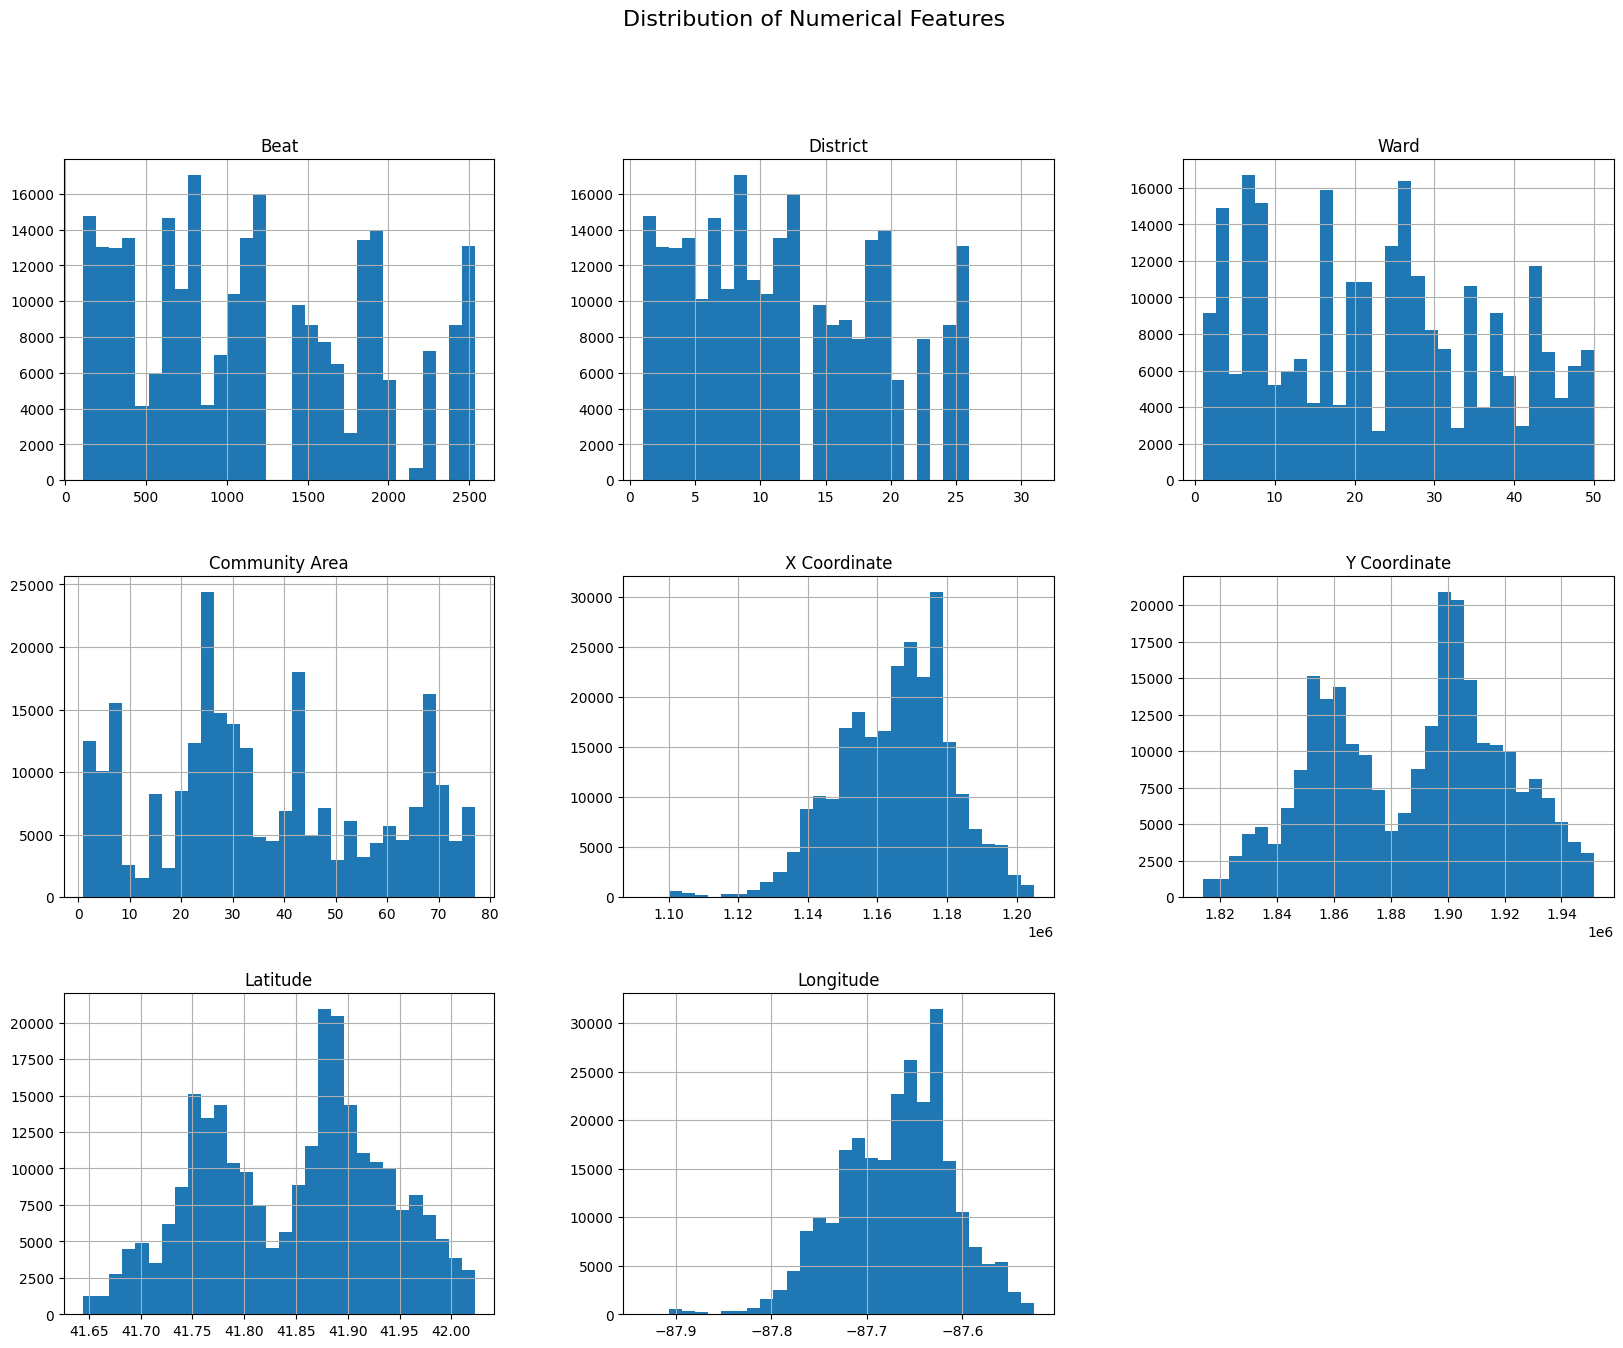

In [294]:
# Plot histograms for all numerical columns
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

The program then analyzes missing values. A loop prints the number of unique values and missing values for each column using .nunique() and .isnull().sum().

In [295]:
for column in df:
    print(f"Unique values in {column}:", df[column].nunique())
    print(f"Missing values in {column}:", df[column].isnull().sum())
    print()

Unique values in Date: 127974
Missing values in Date: 0

Unique values in Primary Type: 31
Missing values in Primary Type: 0

Unique values in Description: 318
Missing values in Description: 0

Unique values in Location Description: 128
Missing values in Location Description: 978

Unique values in Arrest: 2
Missing values in Arrest: 0

Unique values in Domestic: 2
Missing values in Domestic: 0

Unique values in Beat: 275
Missing values in Beat: 0

Unique values in District: 23
Missing values in District: 0

Unique values in Ward: 50
Missing values in Ward: 0

Unique values in Community Area: 77
Missing values in Community Area: 2

Unique values in X Coordinate: 50350
Missing values in X Coordinate: 78

Unique values in Y Coordinate: 70400
Missing values in Y Coordinate: 78

Unique values in Latitude: 122070
Missing values in Latitude: 78

Unique values in Longitude: 122062
Missing values in Longitude: 78



The 'df.isnull().sum()' that was explained on the previous cell is basically checking on how many missing values are there in each column. It is now stored in the variable 'missing_value'. Then, it printed along with the function '.todict()' that converts the resulting Series into a dictionary. The keys in the dictionary will be the column names, and the values will be the count of missing value for each column.

In [296]:
missing_values = df.isnull().sum()
print(missing_values.to_dict())

{'Date': 0, 'Primary Type': 0, 'Description': 0, 'Location Description': 978, 'Arrest': 0, 'Domestic': 0, 'Beat': 0, 'District': 0, 'Ward': 0, 'Community Area': 2, 'X Coordinate': 78, 'Y Coordinate': 78, 'Latitude': 78, 'Longitude': 78}


The 'df.dropna(axis=1, how='all', inplace=True)' line basically removes the column that has only missing values acrross all rows. The 'df.dropna()' function used to drop rows or columns that contain missing values, the 'axis=1' specifies that will drop columns not rows. If the 'axis=0' it would drop rows, the 'how='all'' means that a column will only be dropped if all of its values are missing, and the 'inplace=True' modifies the DataFrame df directly. The changes are applied to the original DatFrame, and there is no need to assign to a new variable. The 'df.columns' will print the names of the remaining columns in the DataFrame after dropping the columns with all missing values.

In [297]:
df.dropna(axis=1, how='all', inplace=True)

print("Remaining columns:")
print(df.columns)

Remaining columns:
Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'],
      dtype='object')


The '.dropna()' method will modify the DataFrame directly. That means that if you set inplace = True , dropna will drop all missing values from your original dataset.The 'df.shape' method will display the number of columns and rows of the DataFrame after removing the columns with missing values. It display together with the 'Shape of DataFrame after removing rows with missing values:'

In [298]:
df.dropna(inplace=True)

print("Shape of DataFrame after removing rows with missing values:", df.shape)

Shape of DataFrame after removing rows with missing values: (254693, 14)


The code first prints the names of the columns in the dataset after handling any missing values using df.columns. This provides the user with a list of the column names that remain in the dataset after any missing data has been addressed, whether by removal or imputation. The next print statement shows the shape of the DataFrame after columns containing missing values have been removed. This is achieved using df.shape, which returns the number of rows and columns in the dataset. By displaying this, the user can see how many columns are left in the DataFrame and how the dataset has changed after handling missing data.

In [299]:
print("Columns of the dataset after handling missing values:\n", df.columns)

print("\nShape of DataFrame after removing columns with missing values:", df.shape)

Columns of the dataset after handling missing values:
 Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'],
      dtype='object')

Shape of DataFrame after removing columns with missing values: (254693, 14)


**Dealing with Duplicates**

The 'for column in df.columns:' iterates over each column in the DataFrame. In each iteration, the variable column will represent the name of the current column. The 'df[column].nunique()' method returns the number of unique values in the current column. For example, if the current column represents age, it will display how many unique values of ages are in the dataset. On the next line, the 'df[column].duplicated().sum()' method is used to count the number of duplicate values in the current column. The 'duplicated()' function identifies whether a value in the column is a duplicate of a previous value and returns a Boolean series. The '.sum()' function then counts how many duplicates are present by summing the True values in the series. This helps identify any repeated values in the column that may require attention. The 'print()' function is used to insert a blank line after the output of each column, improving the formatting and readability by separating the results for each column.

In [300]:
for column in df.columns:
    print(f"Unique values in {column}:", df[column].nunique())
    print(f"Number of duplicates in '{column}' column: {df[column].duplicated().sum()} \n")

Unique values in Date: 127619
Number of duplicates in 'Date' column: 127074 

Unique values in Primary Type: 31
Number of duplicates in 'Primary Type' column: 254662 

Unique values in Description: 318
Number of duplicates in 'Description' column: 254375 

Unique values in Location Description: 128
Number of duplicates in 'Location Description' column: 254565 

Unique values in Arrest: 2
Number of duplicates in 'Arrest' column: 254691 

Unique values in Domestic: 2
Number of duplicates in 'Domestic' column: 254691 

Unique values in Beat: 275
Number of duplicates in 'Beat' column: 254418 

Unique values in District: 23
Number of duplicates in 'District' column: 254670 

Unique values in Ward: 50
Number of duplicates in 'Ward' column: 254643 

Unique values in Community Area: 77
Number of duplicates in 'Community Area' column: 254616 

Unique values in X Coordinate: 50259
Number of duplicates in 'X Coordinate' column: 204434 

Unique values in Y Coordinate: 70250
Number of duplicates in

The 'unique_columns = []' initializes an empty list to store the names of columns where each row is unique. The 'for column in df.columns:' loop iterates over each column in the DataFrame. In each iteration, the variable column represents the current column's name. The condition 'if df[column].nunique() == len(df):' checks if the number of unique values in the column is equal to the number of rows in the DataFrame. This means that each value in the column is unique for each row. If the condition is true, the column name is appended to the 'unique_columns' list. Finally, the 'print("Columns where each row is unique:")' and 'print(unique_columns)' statements display the list of columns where every row has a unique value. This helps identify columns where no values are repeated across rows in the dataset.

In [301]:
unique_columns = []
for column in df.columns:
    if df[column].nunique() == len(df):
        unique_columns.append(column)

print("Columns where each row is unique:")
print(unique_columns)

Columns where each row is unique:
[]


The 'unique_columns = []' initializes an empty list to store the names of columns where each row is unique. The 'for column in df.columns:' loop iterates over each column in the DataFrame. In each iteration, the variable column represents the current column's name. The condition 'if df[column].nunique() == len(df):' checks if the number of unique values in the column is equal to the number of rows in the DataFrame. This means that each value in the column is unique for each row. If the condition is true, the column name is appended to the 'unique_columns' list. Finally, the 'print("Columns where each row is unique:")' and 'print(unique_columns)' statements display the list of columns where every row has a unique value. This helps identify columns where no values are repeated across rows in the dataset.

In [302]:
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print()

Unique values in column 'Date':
['01/02/2024 12:00:00 AM' '01/02/2024 12:01:00 AM'
 '01/02/2024 12:15:00 AM' ... '12/30/2024 11:44:00 PM'
 '12/30/2024 11:58:00 PM' '12/31/2024 12:00:00 AM']

Unique values in column 'Primary Type':
['THEFT' 'MOTOR VEHICLE THEFT' 'DECEPTIVE PRACTICE' 'CRIMINAL DAMAGE'
 'OTHER OFFENSE' 'BATTERY' 'ASSAULT' 'BURGLARY' 'WEAPONS VIOLATION'
 'ROBBERY' 'CRIMINAL TRESPASS' 'CRIMINAL SEXUAL ASSAULT'
 'OFFENSE INVOLVING CHILDREN' 'SEX OFFENSE' 'NARCOTICS' 'STALKING'
 'PUBLIC PEACE VIOLATION' 'OBSCENITY' 'KIDNAPPING'
 'INTERFERENCE WITH PUBLIC OFFICER' 'ARSON' 'LIQUOR LAW VIOLATION'
 'HOMICIDE' 'INTIMIDATION' 'PROSTITUTION'
 'CONCEALED CARRY LICENSE VIOLATION' 'HUMAN TRAFFICKING'
 'PUBLIC INDECENCY' 'GAMBLING' 'OTHER NARCOTIC VIOLATION' 'NON-CRIMINAL']

Unique values in column 'Description':
['OVER $500' 'AUTOMOBILE' 'ILLEGAL USE CASH CARD' 'TO VEHICLE' 'FORGERY'
 'ATTEMPT - AUTOMOBILE' 'FINANCIAL IDENTITY THEFT $300 AND UNDER'
 'HARASSMENT BY TELEPHONE' '$500 AND 

The code defines a function detect_outliers_iqr(df) to identify outliers in the numerical columns of a DataFrame using the Interquartile Range (IQR) method. The function works by calculating the first quartile (Q1) and third quartile (Q3) for each numeric column in the DataFrame. Then, it calculates the IQR (the difference between Q3 and Q1). The outlier boundaries are determined by the formula: lower bound = Q1 - 1.5 * IQR and upper bound = Q3 + 1.5 * IQR. Any value outside these bounds is considered an outlier. If any outliers are detected for a column, the column name and the outlier values are added to the outliers dictionary. The function returns this dictionary, where each key is a column name and each value is a list of outlier values for that column. After detecting the outliers, the code iterates over the dictionary outliers_iqr (which contains the outliers for each column), and for each column, it generates a boxplot to visualize the data distribution and outliers. The boxplot is created using the plt.boxplot() function, which shows the median, quartiles, and any potential outliers. The boxplot is displayed with the title indicating which column is being visualized. This process helps in identifying the columns in the dataset that contain extreme values or outliers, which could be important to address before modeling. The boxplots provide a clear visual representation of how the data is distributed and where the outliers lie in relation to the rest of the data.

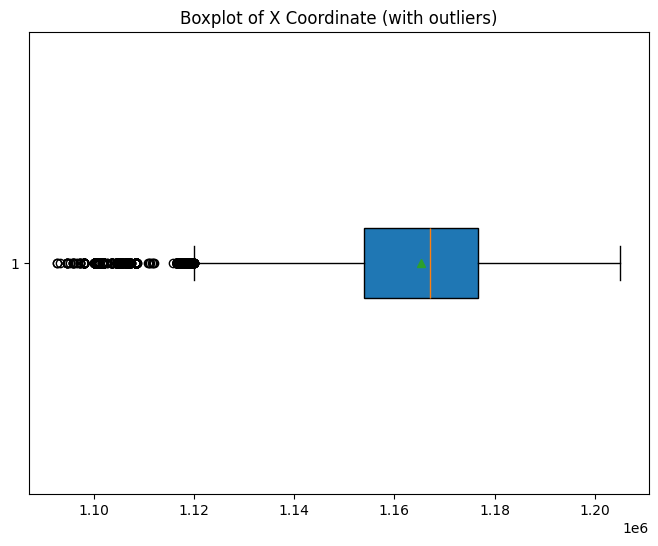

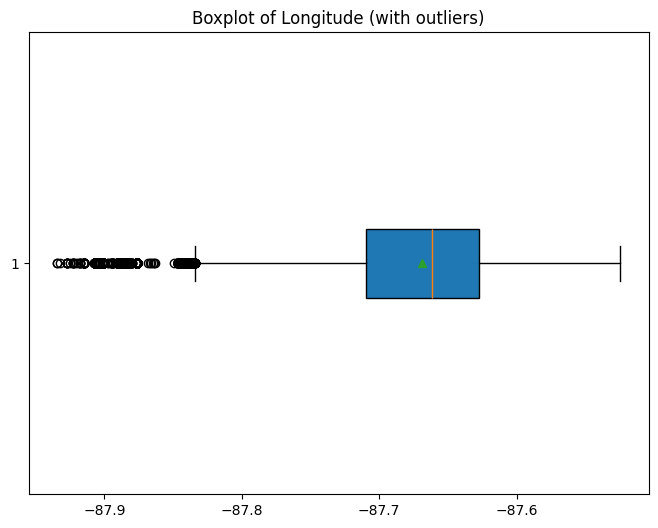

In [303]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        if not column_outliers.empty:
            outliers[column] = column_outliers
    return outliers

outliers_iqr = detect_outliers_iqr(df)

for column, values in outliers_iqr.items():
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column], vert=False, patch_artist=True, showmeans=True)
    plt.title(f'Boxplot of {column} (with outliers)')
    plt.show()


The code defines a function 'remove_outliers_iqr(df)' that removes outliers from the DataFrame using the Interquartile Range (IQR) method. Similar to the previous function for detecting outliers, this function calculates the first quartile (Q1), third quartile (Q3), and IQR for each numeric column. It then defines the lower bound and upper bound for outliers using the formula: lower bound = Q1 - 1.5 * IQR and upper bound = Q3 + 1.5 * IQR. The function filters the DataFrame to include only the rows where the values in each column lie within these bounds. This removes the rows containing outliers for each column, and the resulting DataFrame is stored in the variable cleaned_df. The function then returns cleaned_df, which is the DataFrame without the outliers. After cleaning the dataset, the code generates a boxplot for each numeric column in the cleaned DataFrame '(df_cleaned)' to visualize the distribution of data without outliers. The boxplot is generated using the 'plt.boxplot()' function, with the showmeans=True argument to display the mean of the column. The boxplots are displayed with the title indicating that the data shown is without outliers. This process is useful for preparing the data before analysis or modeling by removing extreme values that could potentially skew the results. The boxplots offer a visual confirmation that the outliers have been removed and that the data distribution looks more consistent.

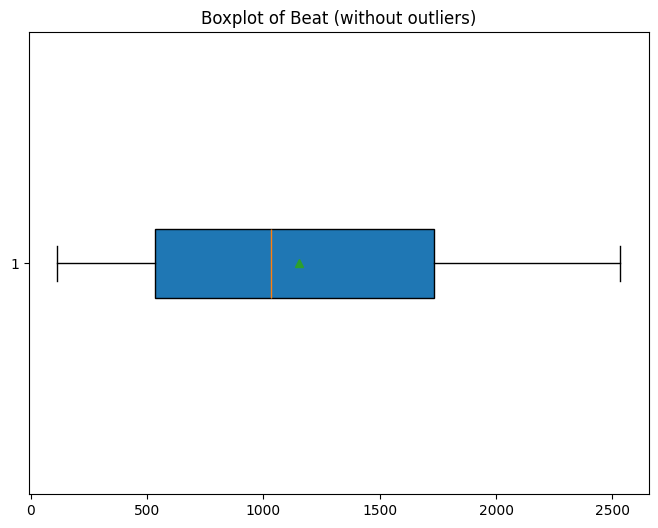

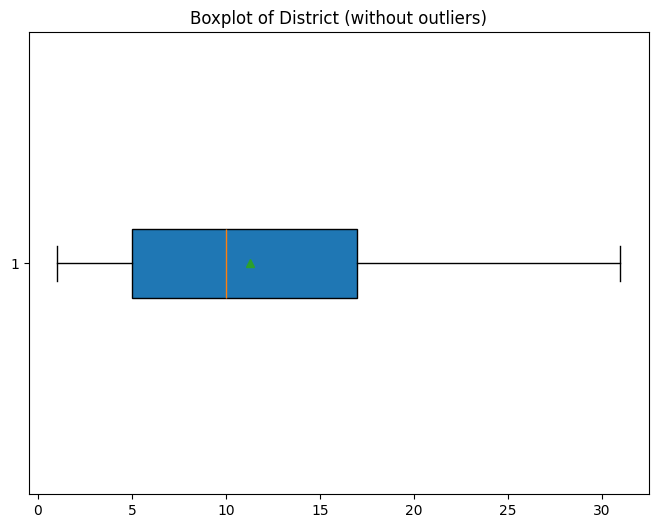

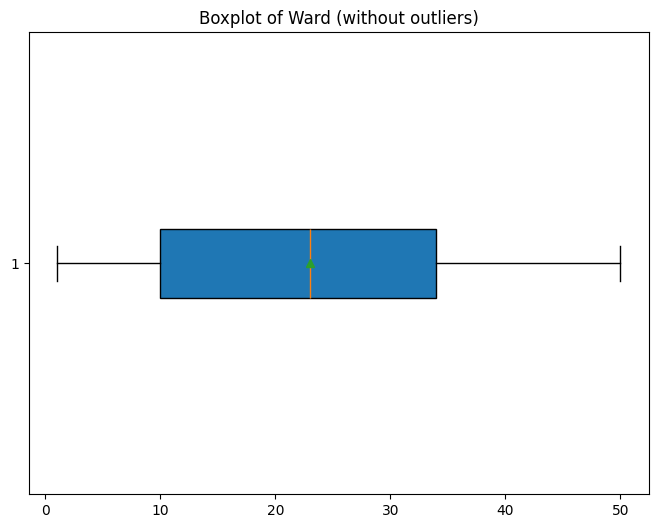

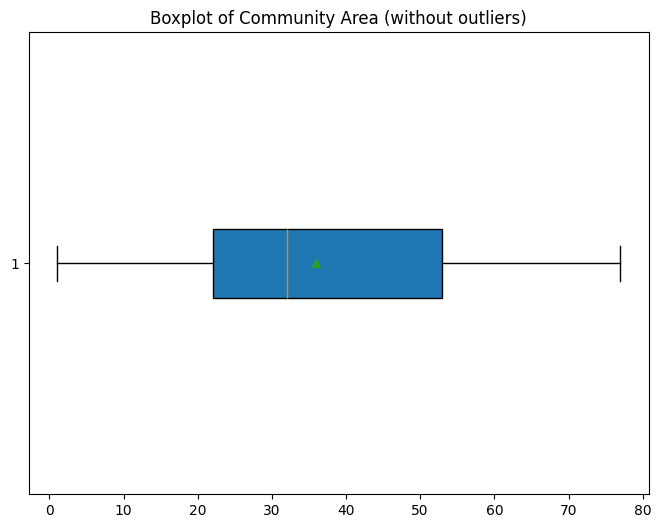

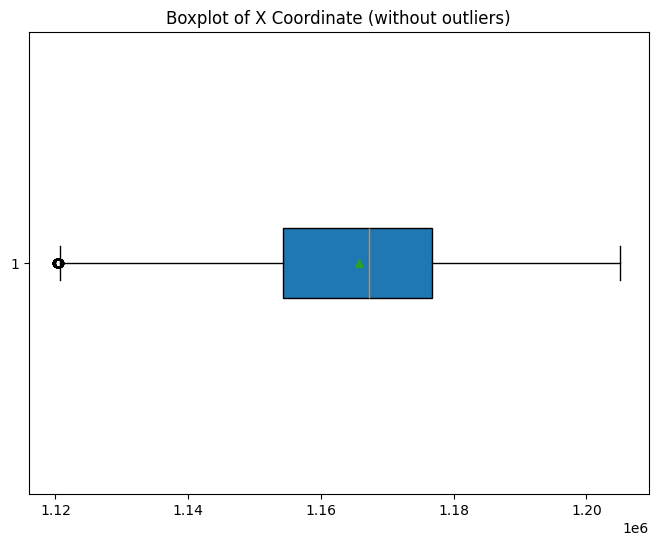

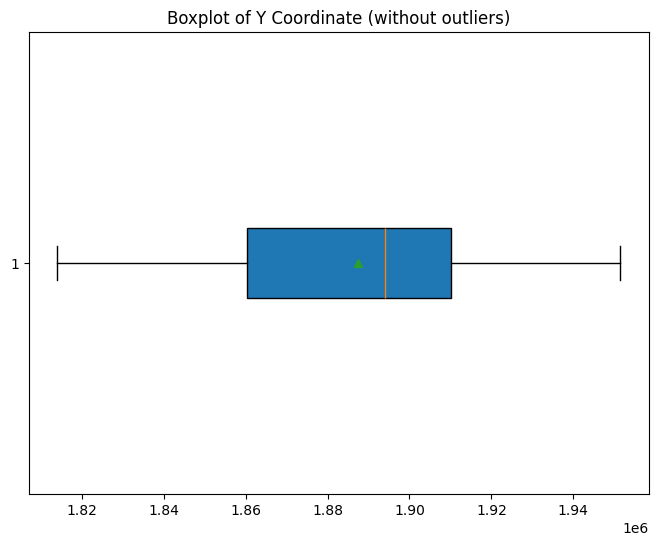

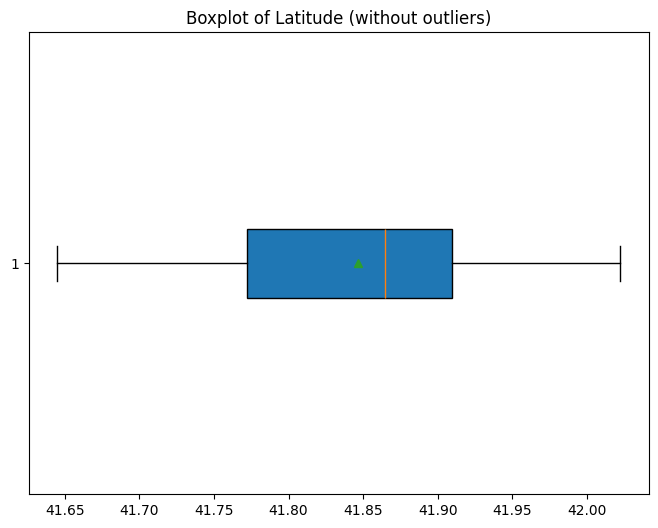

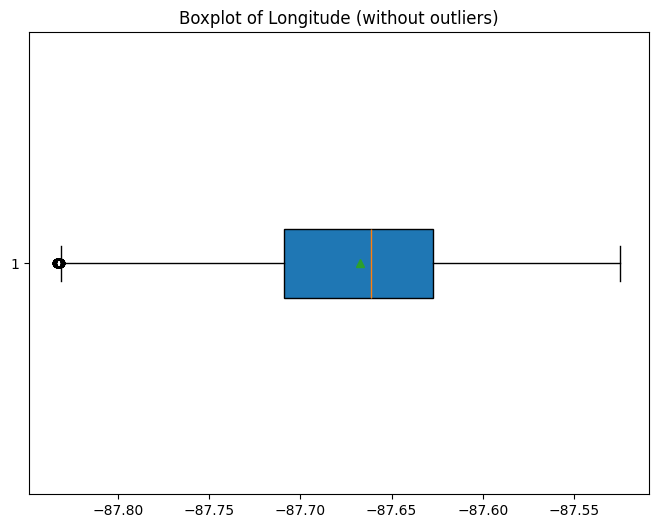

In [304]:
def remove_outliers_iqr(df):
    cleaned_df = df.copy()
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
    return cleaned_df

df_cleaned = remove_outliers_iqr(df)

for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_cleaned[column], vert=False, patch_artist=True, showmeans=True)
    plt.title(f'Boxplot of {column} (without outliers)')
    plt.show()


The code creates a new empty DataFrame df with the same number of rows and columns as the cleaned dataset df_cleaned, but without any of the original data. The 'df_cleaned.shape[0]' returns the number of rows in the cleaned dataset, and 'df_cleaned.shape[1]' returns the number of columns. The range '(df_cleaned.shape[0])' generates a sequence of numbers corresponding to the number of rows, while range'(df_cleaned.shape[1])' generates a sequence corresponding to the number of columns. By passing these ranges to the 'pd.DataFrame()' function, a DataFrame is created with the same structure (same number of rows and columns) but without any actual data, as the cells are initially empty. Finally, the shape of this new empty DataFrame df is printed to show the number of rows and columns in it.

In [305]:
print("Shape of the cleaned dataset:", df_cleaned.shape)
print("Columns of the cleaned dataset:\n", df_cleaned.columns)

Shape of the cleaned dataset: (252951, 14)
Columns of the cleaned dataset:
 Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'],
      dtype='object')


The code prints the names of the columns in the cleaned dataset df_cleaned using df_cleaned.columns. This provides an overview of all the features that remain in the dataset after outlier removal. Then, the variable num_columns is assigned the number of columns in the cleaned dataset by calculating the length of df_cleaned.columns. The len() function counts the number of column names, which gives the total number of features left in the dataset after cleaning. Finally, the number of columns is printed with the message "Number of columns in the dataset after cleaning," showing how many columns remain in the dataset after the outliers have been removed.

In [306]:
print("Columns of the cleaned dataset::\n", df_cleaned.columns)

num_columns = len(df_cleaned.columns)

print("\nNumber of columns in the dataset after cleaning:", num_columns)

Columns of the cleaned dataset::
 Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude'],
      dtype='object')

Number of columns in the dataset after cleaning: 14


A new column, "Crime_Count", is created to count the number of crimes per district. The .groupby() function is used with .transform("count") to assign the count of crimes to every row in the same district:.

In [307]:

df_cleaned["Crime_Count"] = df_cleaned.groupby("District")["District"].transform("count")

The code selects the numerical columns from the cleaned dataset df_cleaned using the select_dtypes(include=['float64', 'int64']) method. This filters the dataset to only include columns with data types float64 or int64, which are typically used for numerical data. The selected numerical columns are stored in the numerical_columns variable. After that, the df_cleaned[numerical_columns].hist() method is used to generate histograms for each of the numerical columns in the cleaned dataset. The bins=50 argument specifies that each histogram will have 50 bins, and figsize=(20, 15) adjusts the size of the figure to make the plots larger for better visualization. Finally, plt.show() displays the histograms, providing a visual representation of the distribution of the numerical data across all selected columns in the cleaned dataset.

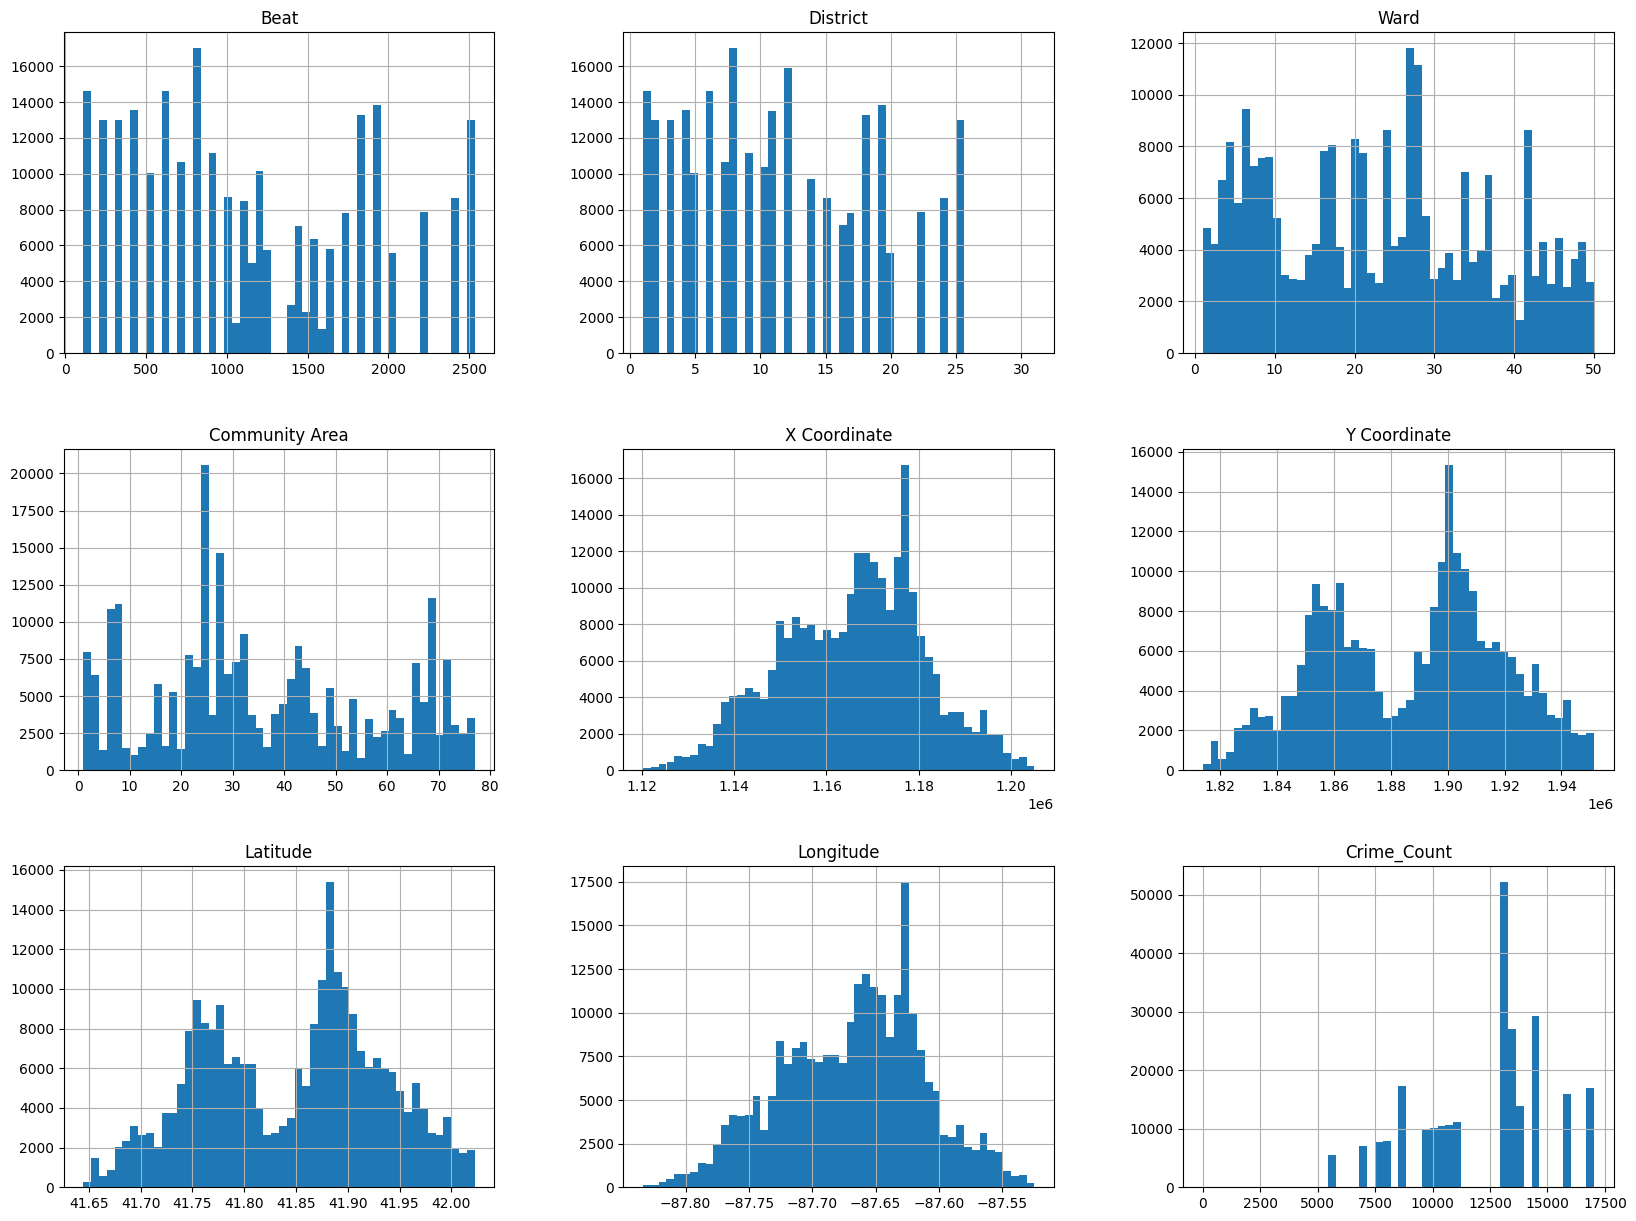

In [308]:
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

df_cleaned[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.show()

The code begins by selecting the numerical columns from the cleaned dataset df_cleaned using the 'select_dtypes(include=['float64', 'int64'])' method, which filters out only the columns with data types float64 or int64. These numerical columns are then stored in the numerical_columns variable. The code then defines an empty dictionary correlation_results to store the correlation coefficients for each numerical attribute with respect to the target attribute. The variable target_attribute is set to 'target', which represents the column in the dataset we are interested in correlating with other numerical attributes. The code loops through each numerical attribute and calculates the correlation coefficient between that attribute and the target attribute using the corr() method. The resulting correlation coefficient is stored in the correlation_results dictionary, with the attribute name as the key. After calculating the correlations, the code prints the correlation coefficients of each numerical attribute with the target attribute, providing insights into the strength and direction of the linear relationship between each attribute and the target variable.

In [309]:
df_cleaned = df_cleaned.dropna()

numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

correlation_results = {}
target_attribute = 'Crime_Count'
for attribute in numerical_columns:
    correlation_coefficient = df_cleaned[attribute].corr(df_cleaned[target_attribute])
    correlation_results[attribute] = correlation_coefficient

print("Correlation coefficients of each numerical attribute with 'target' attribute:")
for attribute, correlation_coefficient in correlation_results.items():
    print(f"{attribute}: {correlation_coefficient}")



Correlation coefficients of each numerical attribute with 'target' attribute:
Beat: -0.40288038633200696
District: -0.4035563859594738
Ward: -0.27450674093824695
Community Area: 0.1419560309487235
X Coordinate: 0.23863213508279887
Y Coordinate: -0.26325811112615877
Latitude: -0.26363102632263014
Longitude: 0.23678700907248162
Crime_Count: 1.0


The code defines a process where the user selects two attributes (attr1 and attr2) from the cleaned dataset to perform correlation analysis. The get_valid_attributes() function prompts the user to input the names of the predictor (attr1) and target (attr2) attributes, which are then stored in the selected_attributes dictionary. The calculate_and_plot_correlation() function checks whether the attributes have been set. If not, it notifies the user to run get_valid_attributes() first. Once the attributes are valid, it calculates the correlation coefficient between attr1 and attr2 using .corr(), which measures the strength and direction of the linear relationship between them. The correlation coefficient is printed, and a scatter plot is generated to visually represent the relationship between the two attributes, with grid lines for clarity. The main() function calls both the get_valid_attributes() and calculate_and_plot_correlation() functions in sequence. The script is executed by calling the main() function when run as the main program. This process allows the user to explore the correlation between two selected variables in the dataset and visualize their relationship.


Enter the predictor attribute: District
Enter the target attribute: Crime_Count

Correlation coefficient (r) between District and Crime_Count: -0.4035563859594738



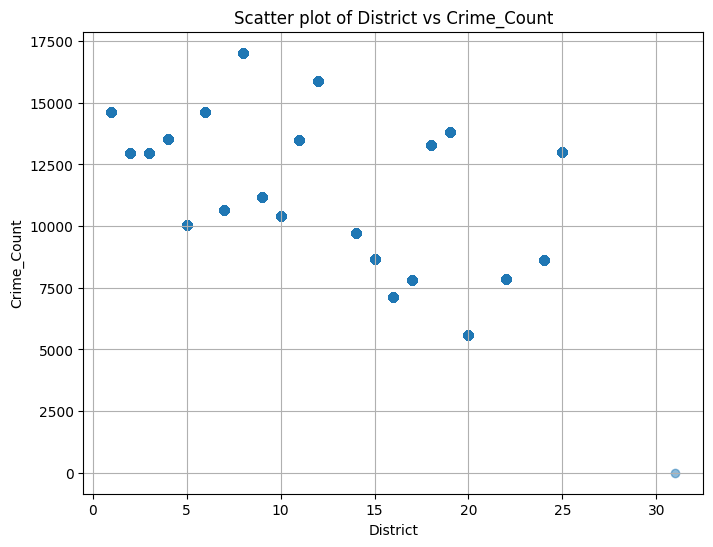

In [312]:
selected_attributes = {}
def get_valid_attributes():
    selected_attributes["attr1"] = input("\nEnter the predictor attribute: ").strip()
    selected_attributes["attr2"] = input("Enter the target attribute: ").strip()

def calculate_and_plot_correlation(df_cleaned):
    if "attr1" not in selected_attributes or "attr2" not in selected_attributes:
        print("Attributes not set. Please run get_valid_attributes() first.")
        return

    attr1 = selected_attributes["attr1"]
    attr2 = selected_attributes["attr2"]

    correlation_coefficient = df_cleaned[attr1].corr(df_cleaned[attr2])
    print(f"\nCorrelation coefficient (r) between {attr1} and {attr2}: {correlation_coefficient}\n")

    plt.figure(figsize=(8, 6))
    plt.scatter(df_cleaned[attr1], df_cleaned[attr2], alpha=0.5)
    plt.title(f"Scatter plot of {attr1} vs {attr2}")
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    plt.grid(True)
    plt.show()

def main():
    get_valid_attributes()
    calculate_and_plot_correlation(df_cleaned)

if __name__ == "__main__":
    main()

The code begins by importing necessary libraries such as LinearRegression from sklearn.linear_model, train_test_split from sklearn.model_selection, and matplotlib.pyplot for plotting. It checks if the variables attr1 and attr2 are present in the selected_attributes dictionary. If either of these attributes is missing, it raises a ValueError, prompting the user to run the attribute selection process first.

Once the attributes are confirmed, attr1 and attr2 are assigned from the selected_attributes dictionary. These represent the independent variable (X) and the dependent variable (y), respectively, which will be used in the linear regression model.

The dataset is then split into training and testing sets using train_test_split(), with a fixed random state for reproducibility. A linear regression model (linreg) is created and fitted on the training data (X_train and y_train).

The code then prints important information about the fitted linear model:

- Intercept: The y-intercept of the regression line.
- Coefficient: The slope of the regression line, which represents the relationship between attr1 and attr2.
- R-squared score (training and test sets): A metric that indicates how well the model fits the data. A score closer to 1.0 means a better fit.

Next, a scatter plot is created to visualize the training data, and the regression line is plotted over it. The plt.scatter() function shows the actual data points, while plt.plot() plots the regression line based on the model’s predictions for the training data. The plot is labeled with the respective attribute names, and a legend is included for clarity. Finally, plt.show() is used to display the plot.

This process helps to visualize and evaluate the performance of the linear regression model for predicting the dependent variable (attr2) based on the independent variable (attr1).

Linear model intercept: 14094.422027619774
Linear model coefficient: -160.2533767955203
R-squared score (training): 0.162
R-squared score (test): 0.164


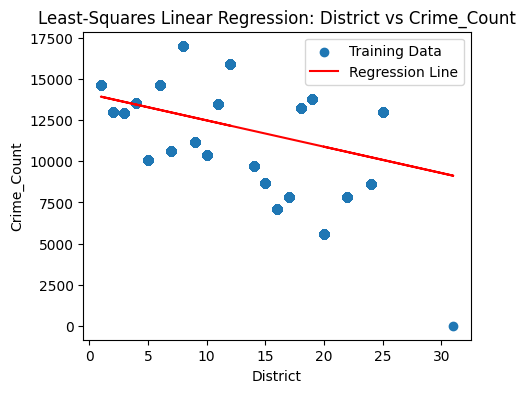

In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

if "attr1" not in selected_attributes or "attr2" not in selected_attributes:
    raise ValueError("Attributes not set. Please run the attribute selection cell first.")

attr1 = selected_attributes["attr1"]
attr2 = selected_attributes["attr2"]


X = df_cleaned[[attr1]]
y = df_cleaned[attr2]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print(f'Linear model intercept: {linreg.intercept_}')
print(f'Linear model coefficient: {linreg.coef_[0]}')
print(f'R-squared score (training): {linreg.score(X_train, y_train):.3f}')
print(f'R-squared score (test): {linreg.score(X_test, y_test):.3f}')

plt.figure(figsize=(5, 4))
plt.scatter(X_train, y_train, marker='o', label="Training Data")
plt.plot(X_train, linreg.predict(X_train), 'r-', label="Regression Line")
plt.title(f'Least-Squares Linear Regression: {attr1} vs {attr2}')
plt.xlabel(attr1)
plt.ylabel(attr2)
plt.legend()
plt.show()



The code allows the user to input a new value for the predictor attribute (attr1) and then uses the trained linear regression model to predict the target attribute (attr2). First, the code prompts the user to enter a new value for attr1 using the input() function, which is converted to a float. This value is then reshaped into a 2D array using np.array([[new_value]]), as the LinearRegression model expects the input in this format for making predictions. After reshaping the value, the linreg.predict() method is called to predict the target value (attr2) based on the input. The predicted value is printed with a formatted message showing the model's prediction for attr2, rounded to three decimal places. This functionality allows the user to make predictions using the trained model by providing a new value for the independent variable (attr1).

In [ ]:
new_value = float(input(f"Enter a new value for {attr1}: "))
new_value_reshaped = np.array([[new_value]])

predicted_target = linreg.predict(new_value_reshaped)
print(f"Model prediction for {attr2}: {predicted_target[0]:.3f}\n")

The code begins by importing the necessary libraries, such as pandas, train_test_split from sklearn.model_selection, and LinearRegression from sklearn.linear_model. The variable predictors is assigned a list of all columns in the cleaned dataset, and target is set to the string 'target', which represents the dependent variable. The code calculates the correlation matrix for the dataset using df_cleaned.corr() and prints it to give an overview of the relationships between all attributes in the dataset.

The user is then prompted to input the top predictor attributes they want to use for the regression model. These predictors are entered as a comma-separated string, which is split into a list using .split(",").

After selecting the predictors, the dataset is divided into features X (the selected predictors) and the target variable y. The data is then split into training and testing sets using train_test_split(), with 80% of the data used for training and 20% for testing. A linear regression model (linreg) is created and trained on the training set using linreg.fit(X_train, y_train).

The code then prints the intercept of the trained model (linreg.intercept_) and the coefficients for each of the selected predictor attributes (linreg.coef_), showing the relationship between each predictor and the target variable. Finally, the R-squared scores for both the training and testing sets are printed using linreg.score(X_train, y_train) and linreg.score(X_test, y_test), which measure how well the model fits the data. The training R-squared score shows the model's fit on the training data, and the testing R-squared score evaluates its generalization to unseen data.

In [313]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_numeric = df_cleaned.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()
print("Correlation Matrix:\n", corr_matrix)

selected_predictors = input("\nEnter the top predictor attributes to use (comma-separated): ").split(",")
selected_predictors = [col.strip() for col in selected_predictors]

selected_predictors = [col for col in selected_predictors if col in df_numeric.columns]

target = 'Crime_Count'
if target not in df_numeric.columns:
    raise ValueError(f"Target attribute '{target}' is not numeric or missing from dataset.")

X = df_cleaned[selected_predictors]
y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(f"\nIntercept: {linreg.intercept_}")
print("\nCoefficients:")
for i, col in enumerate(selected_predictors):
    print(f"{col}: {linreg.coef_[i]}")

print(f"\nTraining R-squared score: {linreg.score(X_train, y_train):.3f}")
print(f"Testing R-squared score: {linreg.score(X_test, y_test):.3f}")


Correlation Matrix:
                     Beat  District      Ward  Community Area  X Coordinate  \
Beat            1.000000  0.999932  0.651454       -0.492978     -0.550267   
District        0.999932  1.000000  0.652444       -0.493081     -0.551899   
Ward            0.651454  0.652444  1.000000       -0.566218     -0.478682   
Community Area -0.492978 -0.493081 -0.566218        1.000000      0.272242   
X Coordinate   -0.550267 -0.551899 -0.478682        0.272242      1.000000   
Y Coordinate    0.635459  0.636671  0.735158       -0.788549     -0.513745   
Latitude        0.636308  0.637524  0.735544       -0.788014     -0.516514   
Longitude      -0.544616 -0.546242 -0.470786        0.262021      0.999905   
Crime_Count    -0.402880 -0.403556 -0.274507        0.141956      0.238632   

                Y Coordinate  Latitude  Longitude  Crime_Count  
Beat                0.635459  0.636308  -0.544616    -0.402880  
District            0.636671  0.637524  -0.546242    -0.403556  
War